**Set Up**

In [1]:
!pip install opencv-python tensorflow matplotlib;

In [2]:
# Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Set working directory

import os

new_dir = "/content/drive/MyDrive/Colab Notebooks/ImageToAudio/data"
os.chdir(new_dir)

print(f"new dir: {os.getcwd()}")

new dir: /content/drive/MyDrive/Colab Notebooks/ImageToAudio/data


**Load and Preprocess**

new dir: /content/drive/MyDrive/Colab Notebooks/ImageToAudio/data
Image Shape: (1880, 2000, 3)
New Image Shape: (250, 250, 3)


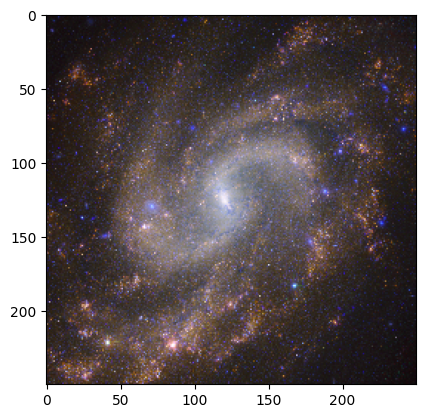

In [4]:
import cv2
import matplotlib.pyplot as plt

print(f"new dir: {os.getcwd()}")

# Load Image Data
image = cv2.imread('2 - Galaxy.png')

# Get Image Shape
print(f"Image Shape: {image.shape}")

#  Resize Image
img = cv2.resize(image, (250,250))

# Check Resizing
print(f"New Image Shape: {img.shape}")

plt.imshow(img)

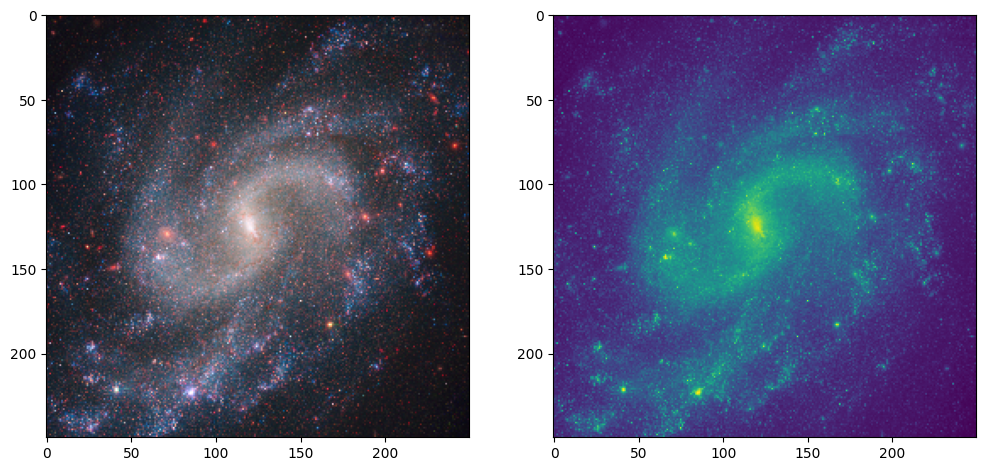

In [5]:
# Obtain Image Features
import numpy as np

# Convert to RGB for visualization with Matplotlib
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to grayscale version to extract intensity
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display the original image and grayscale image using Matplotlib
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(image_rgb) # View RGB

axs[1].imshow(image_gray) # View Gray

In [6]:
# Extract Color and Intensity for Each Pixel

height, width, channels = img.shape

for x in range(width):
  if x == 250:
    break
  for y in range(height):
    if y == 250:
      break

    # Get RGB values
    r, g, b = image_rgb[x, y]

    # Get Grayscale Intensity
    intensity = image_gray[x, y]

  # Display Pixel Info
  if x < 251:
    print(f"Pixel at ({x}, {y}: R={r}, G={g}, B={b}, Intensity={intensity})")

Pixel at (0, 250: R=17, G=19, B=34, Intensity=20)
Pixel at (1, 250: R=22, G=17, B=20, Intensity=19)
Pixel at (2, 250: R=16, G=15, B=19, Intensity=16)
Pixel at (3, 250: R=19, G=15, B=18, Intensity=17)
Pixel at (4, 250: R=26, G=20, B=25, Intensity=22)
Pixel at (5, 250: R=21, G=23, B=28, Intensity=23)
Pixel at (6, 250: R=32, G=28, B=25, Intensity=29)
Pixel at (7, 250: R=39, G=30, B=24, Intensity=32)
Pixel at (8, 250: R=24, G=21, B=19, Intensity=22)
Pixel at (9, 250: R=41, G=33, B=36, Intensity=36)
Pixel at (10, 250: R=37, G=32, B=28, Intensity=33)
Pixel at (11, 250: R=31, G=23, B=20, Intensity=25)
Pixel at (12, 250: R=26, G=24, B=27, Intensity=25)
Pixel at (13, 250: R=20, G=25, B=28, Intensity=24)
Pixel at (14, 250: R=18, G=20, B=27, Intensity=20)
Pixel at (15, 250: R=31, G=28, B=23, Intensity=28)
Pixel at (16, 250: R=21, G=24, B=28, Intensity=24)
Pixel at (17, 250: R=36, G=37, B=19, Intensity=35)
Pixel at (18, 250: R=24, G=20, B=31, Intensity=22)
Pixel at (19, 250: R=27, G=22, B=33, Inte

In [25]:
# Convert Features to Frequencies, only based on intensity
fbase = 600
fmax = 1000
f_array = []
freq_array = []

for x in range(width):
  if x == 250:
    break
  max_intensity = 0

  for y in range(height):
    if y == 250:
      break

    intensity = image_gray[x, y]

    if intensity > max_intensity:
      max_intensity = intensity

  # Convert Max_Intensity to Frequency
  f = fbase + (max_intensity / 255) * (fmax - fbase)
  f_array.append(f)
print(f_array)

for i in range(0, len(f_array), 2):
    if i+1 < len(f_array):
        new_freq = np.min([f_array[i], f_array[i+1]])
        freq_array.append(new_freq)
    else:
        freq_array.append(f_array[i])

print(freq_array)
print(len(freq_array))

[788.2352941176471, 727.0588235294117, 752.156862745098, 863.5294117647059, 761.5686274509803, 770.9803921568628, 813.3333333333334, 750.5882352941177, 808.6274509803922, 764.7058823529412, 767.843137254902, 805.4901960784314, 855.6862745098039, 871.3725490196078, 796.078431372549, 916.8627450980392, 866.6666666666666, 918.4313725490197, 816.4705882352941, 810.1960784313726, 832.1568627450981, 766.2745098039215, 788.2352941176471, 899.6078431372549, 766.2745098039215, 775.686274509804, 772.5490196078431, 752.156862745098, 742.7450980392157, 778.8235294117648, 761.5686274509803, 731.7647058823529, 825.8823529411765, 880.7843137254902, 822.7450980392157, 799.2156862745098, 785.0980392156863, 789.8039215686274, 766.2745098039215, 785.0980392156863, 772.5490196078431, 840.0, 836.8627450980392, 761.5686274509803, 819.6078431372549, 934.1176470588235, 770.9803921568628, 841.5686274509803, 796.078431372549, 844.7058823529412, 774.1176470588235, 844.7058823529412, 800.7843137254902, 818.039215

In [26]:
import numpy as np
from scipy.io.wavfile import write

def generate_sine_wave(frequency, duration, sample_rate=22050):
    t = np.linspace(0, duration, int(sample_rate * duration), False)
    tone = np.sin(2 * np.pi * frequency * t)
    return tone

total_duration = 20
duration_wave_1 = total_duration / len(freq_array)

# Harmonics
num_harmonics = 3
harmonic_amplitude_scale = 0.5

combined_wave = np.array([])

for frequency in freq_array:
    frequency /= 3

    sine_wave_1 = generate_sine_wave(frequency, duration_wave_1)

    for harmonic in range(2, num_harmonics + 1):
      harmonic_freq = frequency * harmonic
      sine_wave_1 += harmonic_amplitude_scale * generate_sine_wave(harmonic_freq, duration_wave_1)

    combined_wave = np.concatenate((combined_wave, sine_wave_1))

# Normalize
combined_wave /= np.max(np.abs(combined_wave))

def wave_shaper(combined_wave):
    shaped_wave = np.tanh(combined_wave * 5)  # Soft clipping using a tanh function
    return shaped_wave

shaped_wave = wave_shaper(combined_wave)

# Save the generated tone as a .wav file
write("1audio.wav", 22050, (shaped_wave * 32767).astype(np.int16))